In [36]:
import bs4
import pandas as pd
from ipywidgets import HTML
import pdfkit

In [16]:
def read_html(path):
    with open(path) as f:
        return f.read()

In [17]:
html_cz = read_html('data/invoice-6501.html')

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<!-- saved from url=(0071)https://eshop.svet-3d-tisku.cz/admin/tisk-dokladu/?type=invoice&id=6501 -->\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-US" lang="en-US"><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n        \n        <meta http-equiv="pragma" content="no-cache">\n        <meta http-equiv="content-language" content="cs">\n        \n        <link rel="stylesheet" type="text/css" href="./invoice-6501_files/basicClasses.css">\n        <link rel="stylesheet" type="text/css" href="./invoice-6501_files/patterns.css">\n        <style>\n            th, td, h1, h2, h3, strong { border-color: #000 !important; background-color: transparent !important; color: #000 !important; }\n            html, body, form, fieldset, label, legend, object { margin: 0; padding: 0; border: 0; font-size: 100% }\n            body, code { font: 71%/1.4 Arial
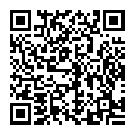

In [18]:
html_cz

In [105]:
translations = pd.read_csv('data/translations.csv')

In [106]:
translations.head()

,cz,en
0,Faktura - Daňový doklad č.,Invoice - tax receipt no.
1,Dodavatel,Supplier
2,DIČ,Tax identification no.
3,Spisová značka: C 175536 - Městský soud v Praze,"File No. 175536, Section C - Municipal Court o..."
4,Telefon,Phone


In [107]:
tr = dict(translations.iloc[0])
tr

{'cz': 'Faktura - Daňový doklad č.', 'en': 'Invoice - tax receipt no.'}

In [108]:
def translate_naive(html_cz, translations):
    # easy but has problem with common substrings :/
    html_en = html_cz
    for i, row in translations.iterrows():
        html_en = html_en.replace(row['cz'], row['en'])
    return html_en

In [109]:
html_en = translate_naive(html_cz, translations)
HTML(html_en)

HTML(value='<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-s…

In [110]:
with open('data/invoice-6501-en.html', 'w') as f:
    f.write(html_en)

In [111]:
# pdfkit.from_string(html_en, 'invoice-6501-en.pdf')

In [112]:
pdfkit.from_file('data/invoice-6501-en.html', 'data/invoice-6501-en.pdf')

Loading pages (1/6)
Counting pages (2/6)
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True

## Translation on the level of HTML to prevent repeated substring substitution

- We have to sort translation string to that no string is substring of a string after it.
- We should mark translated strings and ignore them from further translation.

In [96]:
for i, row in translations.iterrows():    
    print(any(row['cz'] in other for other in translations['cz'][i+1:]), row['cz'])

False Faktura - Daňový doklad č.
False Dodavatel
False DIČ
False Spisová značka: C 175536 - Městský soud v Praze
False Telefon
False E-mail
False Datum vystavení
False Datum splatnosti
False Datum zdanitelného plnění
False Číslo účtu
False Forma úhrady
False Kartou
False Variabilní symbol
False Konstantní symbol
False Specifický symbol
False Objednávka č.
False Ze dne
False Příjemce
False Doručovací adresa
False Číslo dodávky
False Množství
False Cena za kus
False Cena
False Sleva
False Celková cena vč. DPH
False Položky objednávky
False ks
False Kč
False Shrnutí
False K zaplacení
False Vydáno
False Neplaťte
False Poznámka: POZOR - NOVÉ ČÍSLO ÚČTU - new account number
False Součet DPH
False Bez DPH
False Sazba
False Vystavil
False Sériové číslo
False Pokladna
False Provozovna
False Režim
False Běžný režim
False Razítko
False Vystaveno softwarem pro internetové obchodování Shoptet.cz
False Zálohová faktura - Kód
False Daňový doklad je v režimu přenesené daňové povinnosti (reverse 

So far it's sufficient to make a correct ordering.